# Tương hỗ Entropy

Tương hỗ Entropy (Cross Entropy) là một hàm mất mát (loss function) thường được sử dụng trong bài toán phân loại của học máy và học sâu. Cross Entropy đo lường sự khác biệt giữa hai phân phối xác suất rời rạc: phân phối xác suất được dự đoán từ mô hình và phân phối xác suất thực tế của nhãn.

Biểu diễn toán học của hàm mất mát Cross Entropy $\mathcal{H}(y,a)$ cho một dữ liệu đơn lẻ trong trường hợp phân loại nhị phân được định nghĩa như sau:
\begin{align*}
\mathcal{H}(y,a)=-\left(y\ln(a)+(1-y)\ln(1-a)\right)
\end{align*}

Trong công thức trên:
* $y$ là nhãn thực tế, nhận giá trị 0 hoặc 1 (nhị phân).
* $a$ là nhãn dự đoán, nhận giá trị trong khoảng $(0,1)$ và là xác suất rơi vào nhãn 1.

Nếu $y=1$ mà $a \cong 0$ thì $\mathcal{H}(y,a)$ nhận giá trị âm lớn. Còn nếu $y=0$ mà $a \cong 1$ cũng vậy. Tóm lại, hàm Cross Entropy trừng phạt những giá trị dự đoán sai nặng nề hơn sai số bình phương. 

Hàm mất mát trên toàn bộ tập dữ liệu có $n$ quan sát là:
\begin{align*}
\mathcal{H}(Y,A)=-\frac{1}{n} \sum_{i=1}^n \left(y_i\ln(a_i)+(1-y_i)\ln(1-a_i)\right)
\end{align*}

Ta sẽ cực tiểu hóa hàm số này, trong đó biểu diễn $Z = W^TX+b$ và $A=f(Z)$. Ta có thể coi $\mathcal{H}$ như một hàm phụ thuộc ba biến $\mathcal{H}(Y,A)=\mathcal{H}(W;X,Y)$ đạo hàm riêng của hàm mất mát tại chỉ một điểm dữ liệu $(x_i,y_i)$ là:
\begin{align*}
\frac{\partial \mathcal{H}(W;x_i,y_i)}{\partial W} = \frac{\partial \mathcal{H}(W;x_i,y_i)}{\partial a_i} \frac{\partial a_i}{\partial W} = - \left(\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i}\right)\frac{\partial a_i}{\partial W} = \frac{a_i-y_i}{a_i(1-a_i)}\frac{\partial a_i}{\partial W}
\end{align*}

Chọn $f$ là hàm sigmoid. Khi đó ta có:
\begin{align*}
\frac{\partial a_i}{\partial W} = \frac{\partial f(z_i)}{\partial W} = \frac{\partial f(z_i)}{\partial z_i}\frac{\partial z_i}{\partial W} = \frac{e^{-z_i}}{(1+e^{-z_i})^2}x_i = a_i(1-a_i)x_i
\end{align*}

Do đó, ta thu được:
\begin{align*}
\frac{\partial \mathcal{H}(W;x_i,y_i)}{\partial W} = (a_i-y_i)x_i
\end{align*}

Trên toàn bộ tập dữ liệu thì:
\begin{align*}
\frac{\partial \mathcal{H}(W;X,Y)}{\partial W} = \frac{1}{n}(A-Y)X
\end{align*}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Định nghĩa hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Định nghĩa hàm chi phí (hay hàm mất mát) dựa trên cross - entropy
def compute_cost(Y, Y_hat):
    m = Y.shape[1]
    return -1/m * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))

# Hồi quy Logistic với Giải thuật Lan truyền ngược

Trong thuật toán này, sử dụng cập nhật theo Gradient Descent:
\begin{align*}
E &= A-Y\\
dW &= \frac{1}{n} \cdot E \cdot X^T\\
db &= \frac{1}{n} \cdot \sum_{i=1}^n E
\end{align*}

Và quy tắc cập nhật:
\begin{align*}
W &= W - \alpha \cdot dW\\
b &= b - \alpha \cdot db
\end{align*}

Trong đó $\alpha$ là tốc độ học (learning rate).

# Gradient Descent

In [3]:
def logistic_regression_nn(X, Y, learning_rate, num_iterations):
    m, n = X.shape  # m: số lượng đặc trưng, n: số lượng mẫu dữ liệu
    
    # Bước 1: Khởi tạo tham số
    W = np.random.randn(1, m) * 0.01 
    b = 0
    costs = [] 
    accuracies = []  
    
    # Bước 2: Lặp qua từng epoch để cập nhật tham số
    for i in range(num_iterations):
        
        # Bước 2.1: Lan truyền tiến để tính output và cost
        Z = np.dot(W, X) + b  
        A = sigmoid(Z)  
        cost = compute_cost(Y, A)
        costs.append(cost) 
        
        # Bước 2.2: Lan truyền ngược để tính gradient
        E = A - Y 
        dW = 1/n * np.dot(E, X.T) 
        db = 1/n * np.sum(E) 
        
        # Bước 2.3: Cập nhật tham số
        W -= learning_rate * dW  
        b -= learning_rate * db  
        
        # Bước 2.4: Tính độ chính xác và lưu giữ giá trị
        accuracy = np.mean((A > 0.5) == Y)  # Tính độ chính xác
        accuracies.append(accuracy)  # Lưu giữ giá trị độ chính xác
        
        # In thông tin quá trình huấn luyện
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}, Accuracy: {accuracy}")

    return W, b, costs, accuracies

In [4]:
# Đọc dữ liệu
data = pd.read_csv("C:\\Users\\admin\\Downloads\\diabetes.csv")
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Chia tập huấn luyện (80%) và tập kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa và tiền xử lý dữ liệu, phép toán .T để lấy chuyển vị
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_T = X_train_scaled.T
y_train_T = y_train.reshape(1, y_train.shape[0])
X_test_T = X_test_scaled.T
y_test_T = y_test.reshape(1, y_test.shape[0])

In [5]:
# Huấn luyện mô hình với tốc độ học 0.5 và số vòng lặp 1000
W, b, costs, accuracies = logistic_regression_nn(X_train_T, y_train_T, learning_rate=0.5, num_iterations=1000)

Iteration 0, Cost: 0.6964765781158765, Accuracy: 0.33876221498371334
Iteration 100, Cost: 0.4678665863704049, Accuracy: 0.7703583061889251
Iteration 200, Cost: 0.46783512155420365, Accuracy: 0.7703583061889251
Iteration 300, Cost: 0.467835068016962, Accuracy: 0.7703583061889251
Iteration 400, Cost: 0.46783506790314194, Accuracy: 0.7703583061889251
Iteration 500, Cost: 0.46783506790287993, Accuracy: 0.7703583061889251
Iteration 600, Cost: 0.4678350679028794, Accuracy: 0.7703583061889251
Iteration 700, Cost: 0.4678350679028793, Accuracy: 0.7703583061889251
Iteration 800, Cost: 0.4678350679028794, Accuracy: 0.7703583061889251
Iteration 900, Cost: 0.4678350679028794, Accuracy: 0.7703583061889251


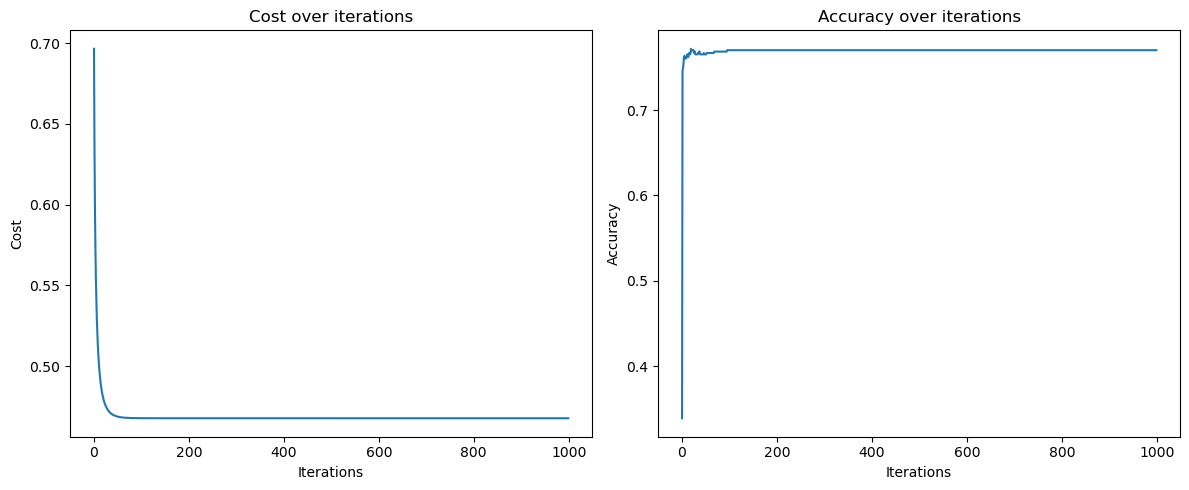

In [6]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [7]:
# Huấn luyện mô hình với tốc độ học 0.1 và số vòng lặp 1000
W, b, costs, accuracies = logistic_regression_nn(X_train_T, y_train_T, learning_rate=0.1, num_iterations=1000)

Iteration 0, Cost: 0.6869857490224074, Accuracy: 0.6775244299674267
Iteration 100, Cost: 0.48008345366125416, Accuracy: 0.7703583061889251
Iteration 200, Cost: 0.4700671294209901, Accuracy: 0.7654723127035831
Iteration 300, Cost: 0.468345961914818, Accuracy: 0.7671009771986971
Iteration 400, Cost: 0.46796359033070356, Accuracy: 0.7687296416938111
Iteration 500, Cost: 0.46786905884927243, Accuracy: 0.7703583061889251
Iteration 600, Cost: 0.4678443421904085, Accuracy: 0.7703583061889251
Iteration 700, Cost: 0.4678376538653377, Accuracy: 0.7703583061889251
Iteration 800, Cost: 0.46783580077889636, Accuracy: 0.7703583061889251
Iteration 900, Cost: 0.4678352782706634, Accuracy: 0.7703583061889251


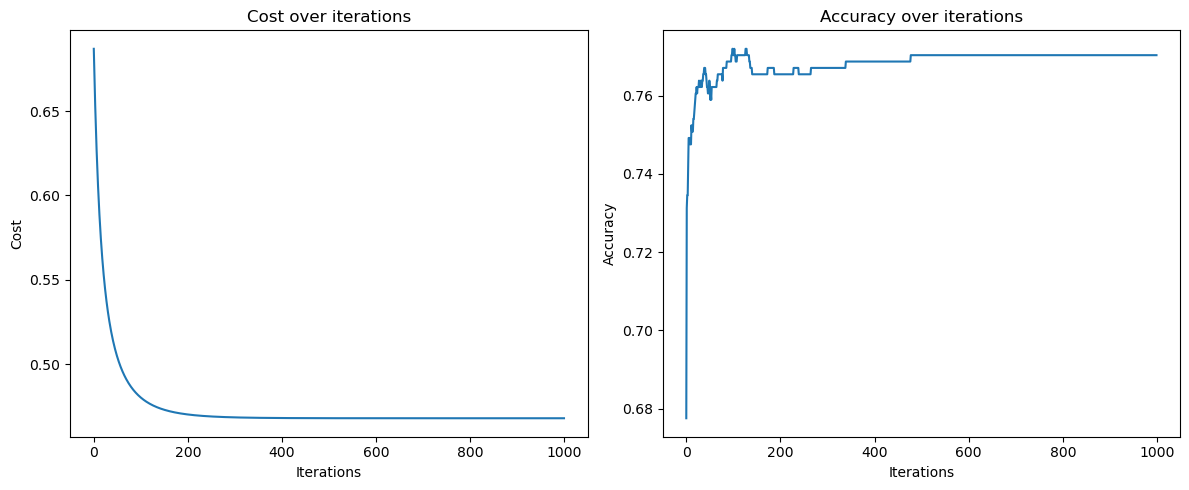

In [8]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

Với tốc độ học 0.5, accuracy và cost hội tụ sau khoảng 100 vòng lặp.
Với tốc độ học 0.1, accuracy và cost hội tụ sau khoảng 500 vòng lặp.

In [9]:
def predict(X, W, b):
    Z = np.dot(W, X) + b
    A = sigmoid(Z)
    Y_pred = np.round(A)
    return Y_pred

def evaluate(Y_pred, Y_true):
    accuracy = np.mean(Y_pred == Y_true)
    return accuracy

# Dự đoán nhãn cho tập kiểm thử
Y_test_pred = predict(X_test_T, W, b)

# Đánh giá độ chính xác
accuracy_test = evaluate(Y_test_pred, y_test_T)
print(f"Accuracy on test set: {accuracy_test}")

Accuracy on test set: 0.7532467532467533


# Stochastic Gradient Descent

In [10]:
def logistic_regression_nn_sgd(X, Y, learning_rate, num_iterations):
    m, n = X.shape
    W = np.random.randn(1, m) * 0.01
    b = 0
    costs = []
    accuracies = []

    for i in range(num_iterations):
        cost_sum = 0
        accuracy_sum = 0
        
        for j in range(n):
            X_j = X[:, j].reshape(-1, 1)
            Y_j = Y[:, j].reshape(-1, 1)

            Z_j = np.dot(W, X_j) + b
            A_j = sigmoid(Z_j)

            cost_j = compute_cost(Y_j, A_j)
            cost_sum += cost_j

            E_j = A_j - Y_j
            dW_j = np.dot(E_j, X_j.T)
            db_j = np.sum(E_j)

            W -= learning_rate * dW_j
            b -= learning_rate * db_j

            accuracy_j = np.mean((A_j > 0.5) == Y_j)
            accuracy_sum += accuracy_j
        
        cost_avg = cost_sum / n
        accuracy_avg = accuracy_sum / n
        costs.append(cost_avg)
        accuracies.append(accuracy_avg)

        if i % 10 == 0:
            print(f"Iteration {i}, Cost: {cost_avg}, Accuracy: {accuracy_avg}")

    return W, b, costs, accuracies

In [11]:
# Huấn luyện mô hình với tốc độ học 0.001 và số vòng lặp 100
W, b, costs, accuracies = logistic_regression_nn_sgd(X_train_T, y_train_T, learning_rate=0.001, num_iterations=100)

Iteration 0, Cost: 0.6578844574014421, Accuracy: 0.745928338762215
Iteration 10, Cost: 0.4943048385107415, Accuracy: 0.7687296416938111
Iteration 20, Cost: 0.47620579520309436, Accuracy: 0.7703583061889251
Iteration 30, Cost: 0.471332899462877, Accuracy: 0.7671009771986971
Iteration 40, Cost: 0.4696718867356823, Accuracy: 0.7654723127035831
Iteration 50, Cost: 0.46903827409718934, Accuracy: 0.7671009771986971
Iteration 60, Cost: 0.46878060514580955, Accuracy: 0.7703583061889251
Iteration 70, Cost: 0.4686714354362986, Accuracy: 0.7703583061889251
Iteration 80, Cost: 0.4686237960319577, Accuracy: 0.7703583061889251
Iteration 90, Cost: 0.46860249837668244, Accuracy: 0.7703583061889251


Thuật toán chỉ mất khoảng 60 vòng lặp để cost và accuracy hội tụ.

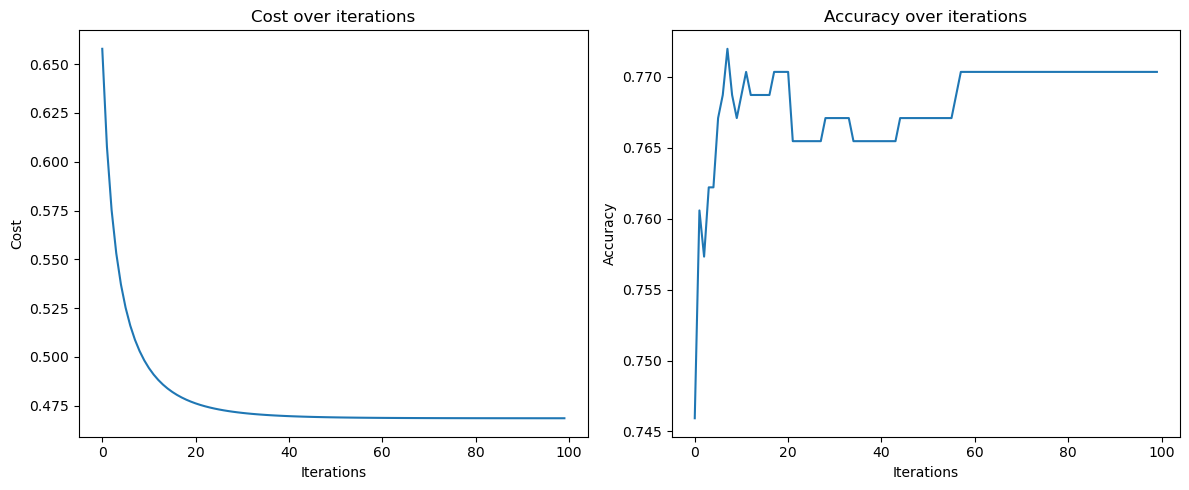

In [12]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [13]:
# Huấn luyện mô hình với tốc độ học 0.01 và số vòng lặp 100
W, b, costs, accuracies = logistic_regression_nn_sgd(X_train_T, y_train_T, learning_rate=0.01, num_iterations=100)

Iteration 0, Cost: 0.5553209628415509, Accuracy: 0.760586319218241
Iteration 10, Cost: 0.47498714872903, Accuracy: 0.7736156351791531
Iteration 20, Cost: 0.4749705667883546, Accuracy: 0.7736156351791531
Iteration 30, Cost: 0.4749701774468005, Accuracy: 0.7736156351791531
Iteration 40, Cost: 0.47497016701386585, Accuracy: 0.7736156351791531
Iteration 50, Cost: 0.47497016674767983, Accuracy: 0.7736156351791531
Iteration 60, Cost: 0.47497016674095327, Accuracy: 0.7736156351791531
Iteration 70, Cost: 0.47497016674078196, Accuracy: 0.7736156351791531
Iteration 80, Cost: 0.47497016674077863, Accuracy: 0.7736156351791531
Iteration 90, Cost: 0.47497016674077885, Accuracy: 0.7736156351791531


Tăng tốc độ học lên 0.01, sau 10 vòng lặp thì cost và accuracy đã hội tụ và độ chính xác cao hơn trước đó.

In [14]:
# Dự đoán nhãn cho tập kiểm thử
Y_test_pred = predict(X_test_T, W, b)

# Đánh giá độ chính xác
accuracy_test = evaluate(Y_test_pred, y_test_T)
print(f"Accuracy on test set: {accuracy_test}")

Accuracy on test set: 0.7597402597402597


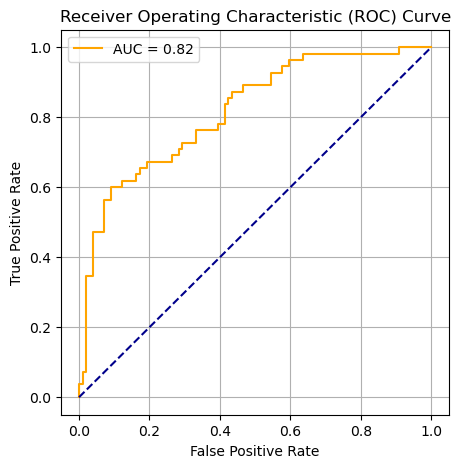

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

def predict_probabilities(W, b, X):
    Z = np.dot(W, X) + b
    A = sigmoid(Z)
    return A.squeeze()

def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


y_score = predict_probabilities(W, b, X_test_T)
plot_roc_curve(y_test, y_score)

# Gradient Descent with Momentum

Gradient Descent with Momentum là một biến thể của Gradient Descent, giúp thuật toán hội tụ nhanh hơn bằng cách tích lũy "momentum" từ các bước cập nhật trước đó. Để áp dụng momentum, chúng ta cập nhật các tham số không chỉ dựa vào gradient hiện tại mà còn dựa vào các bước cập nhật trước đó.

Công thức cập nhật tham số với momentum như sau:

\begin{align*}
V_{dW} &= \beta V_{dW} + (1-\beta)\cdot dW\\
V_{db} &= \beta V_{db} + (1-\beta)\cdot db\\
W &= W - \alpha \cdot V_{dW}\\
b &= b - \alpha \cdot V_{db}
\end{align*}

Trong đó:
* $\alpha$ là tốc độ học.
* $\beta$ là hệ số momentum (thường được chọn là 0.9).
* $V_{dW}$ và $V_{db}$ là giá trị moving average của gradient.
* $dW$ và $db$ là gradient của hàm chi phí đối với $W$ và $b$ tương ứng.

In [16]:
def logistic_regression_nn_momentum(X, Y, learning_rate, num_iterations, beta=0.9):
    m, n = X.shape
    W = np.random.randn(1, m) * 0.01
    b = 0
    costs = []
    accuracies = []

    # Khởi tạo giá trị momentum
    V_dW = np.zeros((1, m))
    V_db = 0

    for i in range(num_iterations):
        Z = np.dot(W, X) + b
        A = sigmoid(Z)
        cost = compute_cost(Y, A)
        costs.append(cost)

        E = A - Y
        dW = 1/n * np.dot(E, X.T)
        db = 1/n * np.sum(E)

        # Cập nhật giá trị momentum
        V_dW = beta * V_dW + (1 - beta) * dW
        V_db = beta * V_db + (1 - beta) * db

        # Cập nhật tham số với momentum
        W -= learning_rate * V_dW
        b -= learning_rate * V_db

        accuracy = np.mean((A > 0.5) == Y)
        accuracies.append(accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}, Accuracy: {accuracy}")

    return W, b, costs, accuracies

In [17]:
# Huấn luyện mô hình với tốc độ học 0.1 và số vòng lặp 1000
W, b, costs, accuracies = logistic_regression_nn_momentum(X_train_T, y_train_T, learning_rate=0.1, num_iterations=1000)

Iteration 0, Cost: 0.6922138983207295, Accuracy: 0.5407166123778502
Iteration 100, Cost: 0.47850757056037885, Accuracy: 0.7703583061889251
Iteration 200, Cost: 0.46957941545184595, Accuracy: 0.7654723127035831
Iteration 300, Cost: 0.4682049573231233, Accuracy: 0.7671009771986971
Iteration 400, Cost: 0.4679218260268812, Accuracy: 0.7687296416938111
Iteration 500, Cost: 0.4678565235895412, Accuracy: 0.7703583061889251
Iteration 600, Cost: 0.467840550442938, Accuracy: 0.7703583061889251
Iteration 700, Cost: 0.4678365006899707, Accuracy: 0.7703583061889251
Iteration 800, Cost: 0.46783544857847315, Accuracy: 0.7703583061889251
Iteration 900, Cost: 0.4678351703301878, Accuracy: 0.7703583061889251


Với tốc độ học 0.1, cost và acurracy hội tụ sau 500 vòng lặp, không nhanh hơn SGD.

# Thiết kế mạng nơ-ron sâu cho Bài toán phân loại nhị phân

Trong phần trước, mạng nơ-ron được thiết kế chỉ gồm lớp input và lớp output có hàm kích hoạt $\text{sigmoid}$. Ta sẽ thiết kế mạng nơ-ron sâu hơn với thêm một lớp ẩn có hàm kích hoạt $\text{ReLU}$ (hàm đơn vị tuyến tính hiệu chỉnh) định nghĩa như sau:
\begin{align*}
\text{ReLU}(z) = \max\{0,z\}
\end{align*}

Có đạo hàm là:
\begin{align*}
\frac{d}{dz}\text{ReLU}(z) = \begin{cases}
          0, \, z<0 \\
          1, \, z>0 \\
                 \end{cases}
\end{align*}

Kiến trúc mạng nơ-ron mới gồm:
* **Đầu vào:** $n_x$ đặc trưng.
* **Lớp ẩn:** Một lớp ẩn với $n_h$ nút và hàm kích hoạt $\text{ReLU}$, có ma trận trọng số $W_1$.
* **Đầu ra:** Một nút đầu ra với hàm kích hoạt $\text{sigmoid}$, có ma trận trọng số $W_2$.

Với mạng nơ-ron cũ, nhiệm vụ là tối ưu hàm chi phí:
\begin{align*}
J = - \frac{1}{n} \sum_{i=1}^n \left(y\ln(\hat{y})+(1-y)\ln(1-\hat{y})\right)
\end{align*}

Trong phần này, ta vẫn tối ưu hàm trên nhưng với điều kiện là tổng bình phương tất cả trọng số bị chặn, để làm giảm độ lớn các trọng số. Bằng phương pháp toán tử Larange, ta bổ sung tham số điều chỉnh $\lambda>0$ và tối ưu hàm chi phí mới:
\begin{align*}
J_{\text{new}} = J + \frac{\lambda}{2n} \sum_{w \in W_1,W_2} w^2
\end{align*}

In [18]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(z.dtype)

def compute_cost_v2(Y, Y_hat, W1, W2, lambd):
    m = Y.shape[1]
    L2_regularization_cost = (lambd / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return (-1/m * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))) + L2_regularization_cost

Iteration 0, Cost: 1.0048380042114327, Accuracy: 0.3811074918566775
Iteration 100, Cost: 0.4794234987488627, Accuracy: 0.762214983713355
Iteration 200, Cost: 0.46343344635623424, Accuracy: 0.7801302931596091
Iteration 300, Cost: 0.46977120356012925, Accuracy: 0.7719869706840391
Iteration 400, Cost: 0.4537095414230741, Accuracy: 0.7817589576547231
Iteration 500, Cost: 0.4590652584174103, Accuracy: 0.7752442996742671
Iteration 600, Cost: 0.4455161601854223, Accuracy: 0.7719869706840391
Iteration 700, Cost: 0.4439255053914467, Accuracy: 0.7801302931596091
Iteration 800, Cost: 0.44401930661654726, Accuracy: 0.7915309446254072
Iteration 900, Cost: 0.4369661342336571, Accuracy: 0.7801302931596091


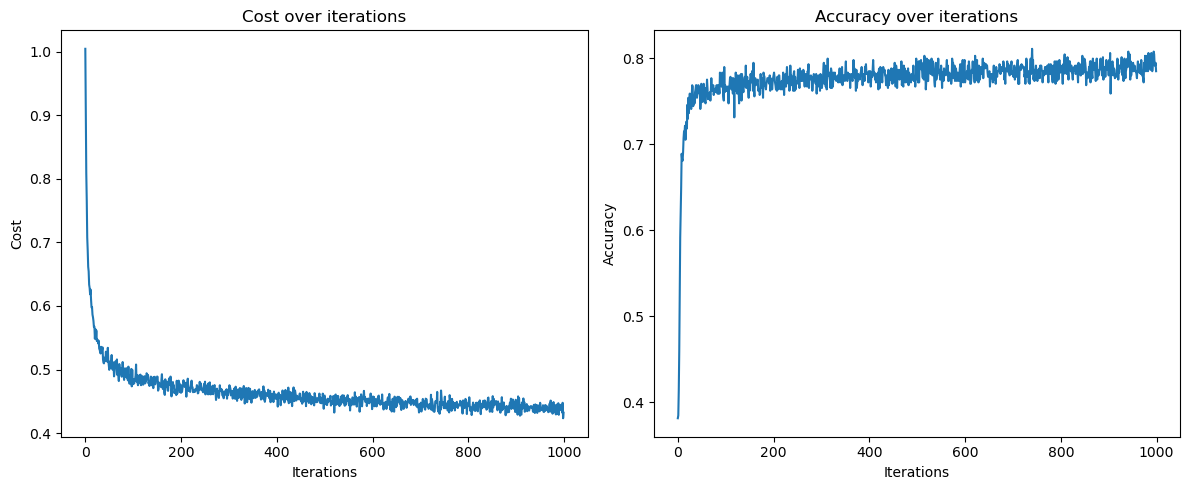

Best accuracy: 0.8110749185667753
Best cost: 0.43038265469275544


In [19]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    
    # Khởi tạo Xavier
    W1 = np.random.randn(n_h, n_x) * np.sqrt(2. / n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * np.sqrt(2. / n_h)
    b2 = np.zeros((n_y, 1))
    
    return W1, b1, W2, b2

def logistic_regression_nn_v2(X, Y, n_h, learning_rate, num_iterations, lambd, keep_prob):
    n_x, m = X.shape
    n_y = Y.shape[0]
    
    W1, b1, W2, b2 = initialize_parameters(n_x, n_h, n_y)
    
    costs = []
    accuracies = []
    best_acc = 0  # keep track of the best accuracy
    best_params = {}  # keep track of the best parameters
    
    for i in range(num_iterations):
        # Lan truyền tiến với Dropout
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        D1 = (np.random.rand(*A1.shape) < keep_prob)  # create a dropout mask
        A1 *= D1  # apply the dropout mask
        A1 /= keep_prob  # scale the value of neurons that haven't been shut down
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        
        cost = compute_cost_v2(Y, A2, W1, W2, lambd)
        costs.append(cost)
        
        # Lan truyền ngược với Dropout
        dZ2 = A2 - Y
        dW2 = (1/m) * np.dot(dZ2, A1.T) + (lambd / m) * W2
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        
        dA1 = np.dot(W2.T, dZ2)
        dA1 *= D1  # apply dropout mask to the backward path
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T) + (lambd / m) * W1
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        # Compute accuracy
        accuracy = np.mean((A2 > 0.5) == Y)
        accuracies.append(accuracy)
        
        # Early stopping: Save the parameters which give the best accuracy on the training set
        if accuracy > best_acc:
            best_acc = accuracy
            best_cost = cost
            best_params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
        
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}, Accuracy: {accuracy}")
    
    return best_params, costs, accuracies, best_cost, best_acc

# Adjusted parameters
n_h = 100  # number of nodes in hidden layer
learning_rate = 0.03  # learning rate
lambd = 0.05  # regularization parameter
keep_prob = 0.9  # dropout keep probability

# Train the model and retrieve results
params, costs, accuracies, best_cost, best_acc = logistic_regression_nn_v2(X_train_T, y_train_T, n_h=n_h, learning_rate=learning_rate, num_iterations=1000, lambd=lambd, keep_prob=keep_prob)

# Plot the cost and accuracy graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# Return the final accuracy
print(f"Best accuracy: {best_acc}")
print(f"Best cost: {best_cost}")

In [20]:
def predict(X, params):
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]
    
    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    return A2 > 0.5

# Predict on the test set
predictions = predict(X_test_T, params)

# Calculate accuracy
accuracy_test = np.mean(predictions == y_test_T)

print(f"Accuracy on test set: {accuracy_test}")

Accuracy on test set: 0.7597402597402597
